# The Sparks Foundation - Data Science and Business Analytics Internship

### Name :- Harshal R. Nirgulkar

### Task No.2:- Prediction Using Unsupervised Machine Learning (Level-Begineer)

In [1]:
#Problem Statement :- From the given "Iris Dataset", Predict the optimum number of clusters & represent its visually.

In [2]:
# Import Required Libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Filter Warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset

iris = pd.read_csv("Iris.csv")


In [4]:
# Print First Five record
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# To check the shape of records
iris.shape

(150, 6)

In [6]:
# To Check Varity of species
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# To check the info of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# To check the statistics data

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# To check any missing value 

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


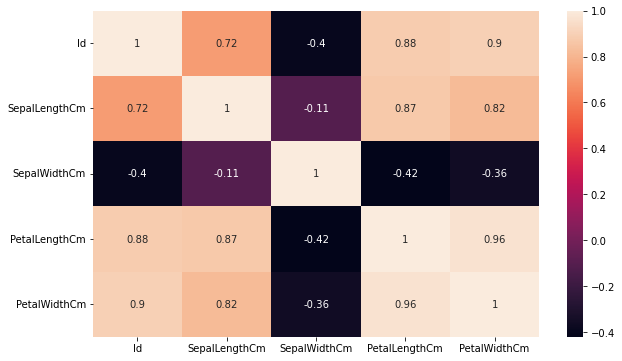

In [10]:
# Finding the correlation and plotting it
corr_data=iris.corr()
display(corr_data)
plt.subplots(figsize=(10,6))
sns.heatmap(corr_data,annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

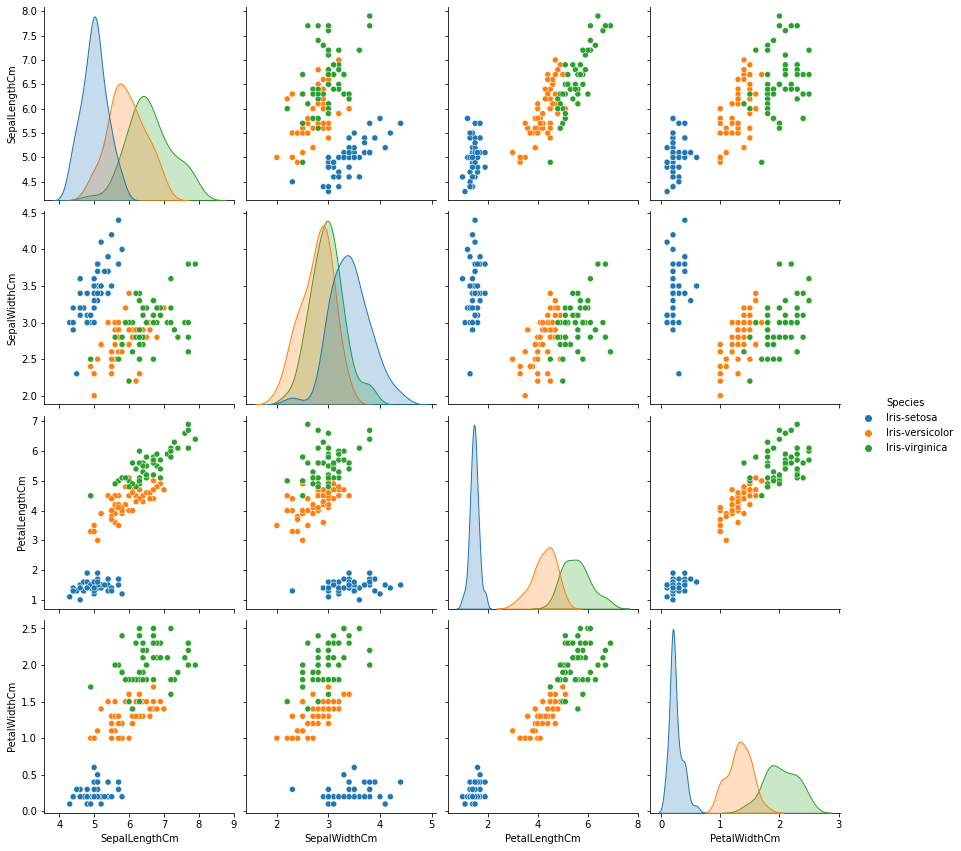

In [11]:
plt.figure()
sns.pairplot(iris.drop("Id", axis=1),hue = 'Species',size = 3)
plt.show()

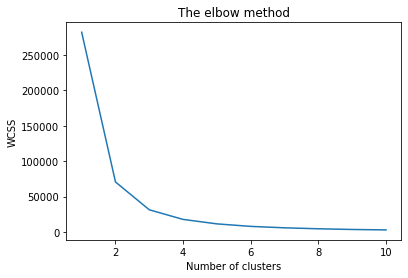

In [12]:
###  "Elbow method" to find optimum number of clusters

X = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), wcss,)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [13]:
#kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

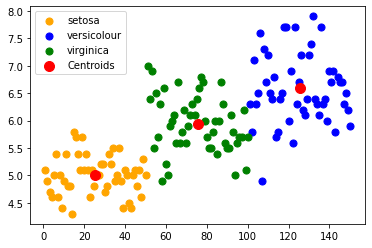

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],  s= 50, c = 'orange', label ='setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 50, c = 'blue', label ='versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 50, c = 'green', label ='virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Red', label = 'Centroids')

plt.legend()

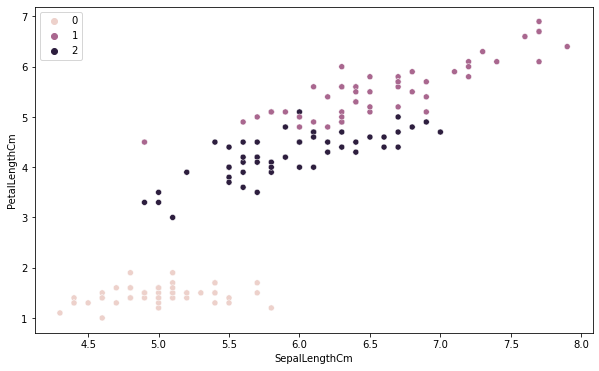

In [15]:
plt.figure(figsize=(10,6))

sns.scatterplot('SepalLengthCm','PetalLengthCm',hue=y_kmeans, data=iris)

plt.show()

In [16]:
# Conclusion :- From given iris dataset,i observed optimum number of clusters is 3.